In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import dataset
df = pd.read_csv("data/silver.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6054 to 5266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   objec

# Introduction

La regression linéaire et la regression logistique sont des algorithmes de machine learning de type modélisation.

Quand on modélise, on suppose que le lien entre les variables explicatives et la variable cible peut être approché par un équation arithmétique qu'il s'agit de retrouver. 

Dans le cas de la régression linéaire on utilise une fonction linéaire:

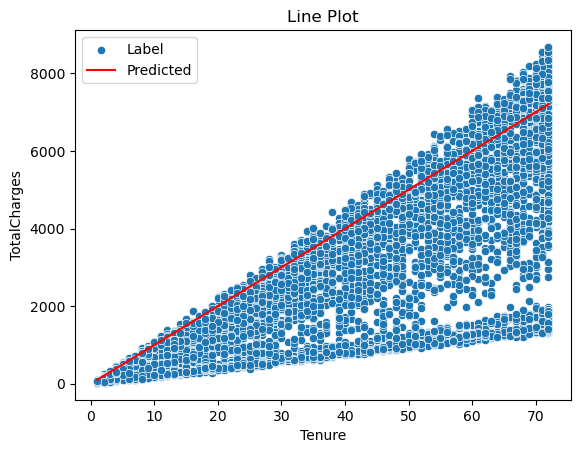

In [23]:
def f(x):
    beta_0 = 2
    beta_1 = 100
    return beta_0 + beta_1 * x

df = df[~df['TotalCharges'].isin([' '])]
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['predicted'] = df['tenure'].apply(f)

# Create the scatter plot using Seaborn for the first line
sns.scatterplot(x='tenure', y='TotalCharges', data=df, label='Label')

# Create the line plot using Seaborn for the second line
sns.lineplot(x='tenure', y='predicted', data=df, label='Predicted',color='red')

# Add labels and title to the plot
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
plt.title('Impact of Tenure on TotalCharges')

# Display the plot
plt.show()

In [ ]:
On ne peut pas directement faire la même chose avec une variable catégoriele:

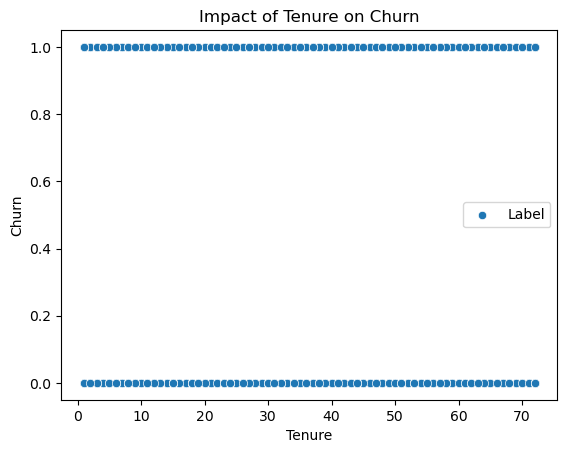

In [24]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Create the scatter plot using Seaborn for the first line
sns.scatterplot(x='tenure', y='Churn', data=df, label='Label')

# Add labels and title to the plot
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Impact of Tenure on Churn')

# Display the plot
plt.show()

Il faut s'y prendre autrement, on va plutot modéliser la probabilité de churn en fonction de l'ancienneté

# I La régression logistique en théorie

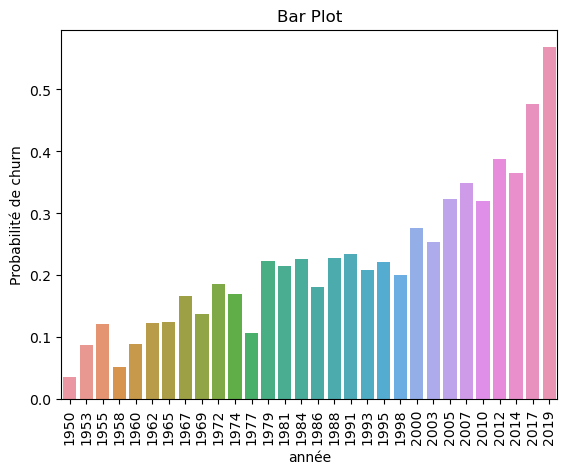

In [35]:
num_classes = 30
df['BinarizedTenure'], bins = pd.cut(2023 - df['tenure'], bins=num_classes, retbins=True)
df['BinarizedTenure'] = df['BinarizedTenure'].astype(str).str[1:5]
df_bin = df.groupby('BinarizedTenure')['Churn'].mean()

sns.barplot(x=df_bin.index, y=df_bin.values)

# Add labels and title to the plot
plt.xlabel('année')
plt.ylabel('Probabilité de churn')
plt.title('Bar Plot')
plt.xticks(rotation='vertical')

plt.show()

On va donc essayer de trouver une fonction  f:

Probabilité de Churn = f(annee_inscription)

Les fonctions linéaires permettent rarement de représenter un tel lien. On prefére souvent utiliser la fonction sigmoide aussi appelée la fonction "**logit** d'ou le nom de régression logistique.

In [44]:
df_bin = df_bin.reset_index()


In [45]:
df_bin

,BinarizedTenure,Churn
0,1950,0.035330
1,1953,0.087179
2,1955,0.121673
3,1958,0.052632
4,1960,0.089041
5,1962,0.123153
6,1965,0.124138
7,1967,0.166667
8,1969,0.137615
9,1972,0.186567


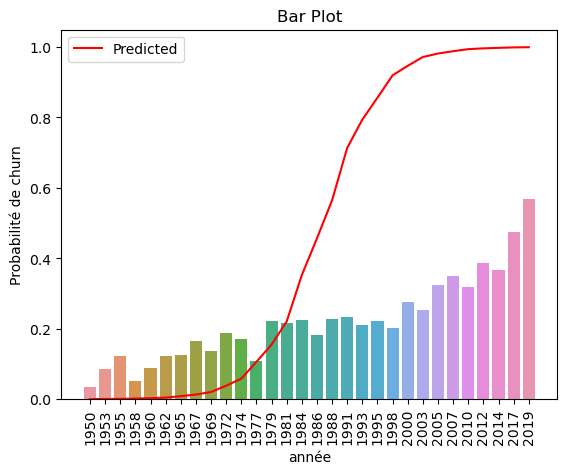

In [118]:



def f(x):
    beta_0 = -8   #-2
    beta_1 = 15  #3
    return  np.exp(beta_0 + beta_1 * ((x-1950)/69)) / ( 1 + np.exp(beta_0 + beta_1 * ((x-1950)/69))) 


df_bin['predicted'] = df_bin['BinarizedTenure'].astype(int).apply(f)

# Create the scatter plot using Seaborn for the first line
sns.barplot(x=df_bin['BinarizedTenure'], y=df_bin['Churn'])

# Create the line plot using Seaborn for the second line
sns.lineplot(x=df_bin['BinarizedTenure'], y=df_bin['predicted'], label='Predicted',color='red')



# Add labels and title to the plot
plt.xlabel('année')
plt.ylabel('Probabilité de churn')
plt.title('Bar Plot')
plt.xticks(rotation='vertical')

plt.show()

On fait la même chose pour les variables catégorielles en les transformant en variables binaires.

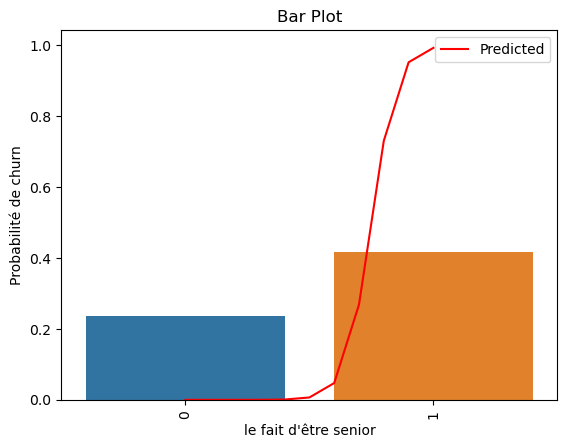

In [111]:
def g(x):
    beta_0 = -15    #-1 
    beta_1 = 20 # 0.5 
    return  np.exp(beta_0 + beta_1 * x) / ( 1 + np.exp(beta_0 + beta_1 * x)) 

predicted = [g(x) for x in np.linspace(0, 1, 11)]

df_senior = df.groupby('SeniorCitizen')['Churn'].mean()
df_senior = df_senior.reset_index()



sns.lineplot(x=np.linspace(0, 1, 11), y=predicted, label='Predicted',color='red')

sns.barplot(x=df_senior['SeniorCitizen'], y=df_senior["Churn"])


# Add labels and title to the plot
plt.xlabel("le fait d'être senior")
plt.ylabel('Probabilité de churn')
plt.title('Bar Plot')
plt.xticks(rotation='vertical')

plt.show()

On utilise donc la fonction pour faire des prédictions sur l'ensemble du dataset

In [117]:
2023-df['tenure']

0       2022
1       1989
2       2021
3       1978
4       2021
        ... 
7038    1999
7039    1951
7040    2012
7041    2019
7042    1957
Name: tenure, Length: 7032, dtype: int64

In [119]:
df['tenure_modele'] = (2023-df['tenure']).apply(f)

In [120]:
df[['tenure_modele','Churn']].head()

,tenure_modele,Churn
0,0.999525,0
1,0.617337,0
2,0.999410,1
3,0.128639,0
4,0.999410,1


In [122]:
df['tenure_prediction'] = df['tenure_modele'].apply(lambda x : 0 if x < 0.5 else 1)

In [123]:
df[['tenure_modele','tenure_prediction','Churn']].head()

,tenure_modele,tenure_prediction,Churn
0,0.999525,1,0
1,0.617337,1,0
2,0.999410,1,1
3,0.128639,0,0
4,0.999410,1,1


In [140]:
crosstab = pd.crosstab(index=df['Churn'], columns=df['tenure_prediction'],
                       rownames=['True Class'], colnames=['Predictions'])
crosstab

Predictions,0,1
True Class,,
0,2643,2520
1,358,1511


In [141]:
TP = ((df['tenure_prediction'] == 1) & (df['Churn'] == 1)).sum()
FP = ((df['tenure_prediction'] == 1) & (df['Churn'] == 0)).sum()
TN = ((df['tenure_prediction'] == 0) & (df['Churn'] == 0)).sum()
FN = ((df['tenure_prediction'] == 0) & (df['Churn'] == 1)).sum()

print( f'\
Les vrais positif (TP):  {TP} (Nombre de prédictions positives (1) du modèle qui sont correctes) \n\
Les faux positifs (FP):  {FP} (Nombre de prédictions positives (1) du modèle qui sont fausses) \n\
Les vrais négatifs (TN): {TN} (Nombre de prédictions négatives (0) du modèle qui sont fausses) \n\
Les faux négatifs (FN):  {FN} (Nombre de prédictions négatives (0) du modèle qui sont fausses) \n\
')



Les vrais positif (TP):  1511 (Nombre de prédictions positives (1) du modèle qui sont correctes) 
Les faux positifs (FP):  2520 (Nombre de prédictions positives (1) du modèle qui sont fausses) 
Les vrais négatifs (TN): 2643 (Nombre de prédictions négatives (0) du modèle qui sont fausses) 
Les faux négatifs (FN):  358 (Nombre de prédictions négatives (0) du modèle qui sont fausses) 



On obtient alors les principales métriques de la classification:

**`Des mesures de précision`**:

- **`Précision`**: à quel point j'ai été bon dans ma prédiction des positifs 
    formule: TP/ (TP + FP)

- **`Accuracy`**: a quel point j'ai été bon en moyenne dans ma prédiction des positifs et des négatifs
    formule: [ TP/ (TP + FP) + TN /( TN + FN) ] / 2

**`Des mesures d'exhaustivité`**:

- **`Recall`** or **`sensibility`**: Quelle est la proportion des positifs que j'ai réussi à trouver parmi la population que j'ai essayé de prédire
    formule: TP/ (TP + FN)
    
- **`Speficity`**: Quelle est la proportion des négatifs que j'ai réussi à trouver parmi la population que j'ai essayé de prédire
    formule: TN / (TN + FP)

**`Des mesures mixtes`**:

- **`F1`**: 2 * (Précision * Rappel) / (Précision + Rappel) 


In [170]:
print(f"\
    Precision: {round(TP / (TP + FP),2)}\n\
    Accuracy: {round((TP + TN) / (TP +FP + TN +FN),2)}\n\
    Recall: {round(TP/(TP+FN),2)} \n\
    Specificity: {round(TN / (TN + FP),2)} \n\
    F1: {round(2* ((TP / (TP + FP))*(TP/(TP+FN)))/((TP / (TP + FP)) + (TP/(TP+FN))),2)} \n\
    ")

    Precision: 0.37
    Accuracy: 0.59
    Recall: 0.81 
    Specificity: 0.51 
    F1: 0.51 
    


Il n'y plus qu'a en faire une fonction

In [171]:
def regression_logistic(beta_0, beta_1):

    num_classes = 30
    df['BinarizedTenure'], bins = pd.cut(2023 - df['tenure'], bins=num_classes, retbins=True)
    df['BinarizedTenure'] = df['BinarizedTenure'].astype(str).str[1:5]
    df_bin = df.groupby('BinarizedTenure')['Churn'].mean()


    def f(x, beta_0, beta_1):
        # beta_0 = -8   #-2
        # beta_1 = 15  #3
        return  np.exp(beta_0 + beta_1 * ((x-1950)/69)) / ( 1 + np.exp(beta_0 + beta_1 * ((x-1950)/69))) 

    df_bin = df_bin.reset_index()
    df_bin['predicted'] = df_bin['BinarizedTenure'].astype(int).apply(lambda x: f(x,beta_0, beta_1))

    # Create the scatter plot using Seaborn for the first line
    sns.barplot(x=df_bin['BinarizedTenure'], y=df_bin['Churn'])

    # Create the line plot using Seaborn for the second line
    sns.lineplot(x=df_bin['BinarizedTenure'], y=df_bin['predicted'], label='Predicted',color='red')



    # Add labels and title to the plot
    plt.xlabel('année')
    plt.ylabel('Probabilité de churn')
    plt.title('Bar Plot')
    plt.xticks(rotation='vertical')

    plt.show()

    df['tenure_modele'] = (2023-df['tenure']).apply(lambda x: f(x,beta_0, beta_1))

    df['tenure_prediction'] = df['tenure_modele'].apply(lambda x : 0 if x < 0.5 else 1)

    crosstab = pd.crosstab(index=df['Churn'], columns=df['tenure_prediction'],
                        rownames=['True Class'], colnames=['Predictions'])
    print(crosstab)

    TP = ((df['tenure_prediction'] == 1) & (df['Churn'] == 1)).sum()
    FP = ((df['tenure_prediction'] == 1) & (df['Churn'] == 0)).sum()
    TN = ((df['tenure_prediction'] == 0) & (df['Churn'] == 0)).sum()
    FN = ((df['tenure_prediction'] == 0) & (df['Churn'] == 1)).sum()

    print(f" \n\
    Precision: {round(TP / (TP + FP),2)}\n\
    Accuracy: {round((TP + TN) / (TP +FP + TN +FN),2)}\n\
    Recal: {round(TP/(TP+FN),2)} \n\
    Specificity: {round(TN / (TN + FP),2)} \n\
    F1: {round(2* ((TP / (TP + FP))*(TP/(TP+FN)))/((TP / (TP + FP)) + (TP/(TP+FN))),2)} \n\
    ")



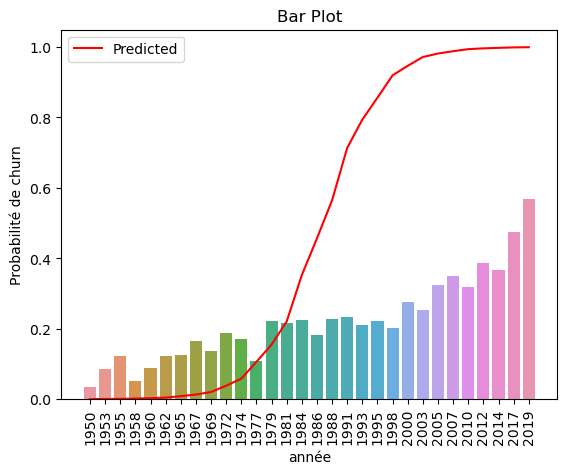

Predictions     0     1
True Class             
0            2643  2520
1             358  1511
 
    Precision: 0.37
    Accuracy: 0.59
    Recal: 0.81 
    Specificity: 0.51 
    F1: 0.51 
    


In [172]:
regression_logistic(-8, 15)

# II La régression logistique en pratique

In [174]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False,test_size=0.2, random_state=42)

In [187]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train =  labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

categorial_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       ]

categorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorial_features)
    ],
    remainder="passthrough" 
)

log_reg = LogisticRegression()

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('log_reg', log_reg)
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('log_reg', LogisticRegression())])

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

/usr/local/Caskroom/miniconda/base/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
print("######## accuracy_score : ")
print("TRAIN :",accuracy_score(y_train, y_pred_train))
print("TEST :",accuracy_score(y_test, y_pred_test))

print("######## f1_score : ")
print("TRAIN :",f1_score(y_train, y_pred_train))
print("TEST :",f1_score(y_test, y_pred_test))

print("######## precision_score : ")
print("TRAIN :",precision_score(y_train, y_pred_train))
print("TEST :",precision_score(y_test, y_pred_test))

print("######## recall_score : ")    
print("TRAIN :",recall_score(y_train, y_pred_train))
print("TEST :",recall_score(y_test, y_pred_test))

######## accuracy_score : 
TRAIN : 0.805111821086262
TEST : 0.8055358410220014
######## f1_score : 
TRAIN : 0.5954310980103169
TEST : 0.5994152046783625
######## precision_score : 
TRAIN : 0.6590538336052202
TEST : 0.6765676567656765
######## recall_score : 
TRAIN : 0.543010752688172
TEST : 0.5380577427821522


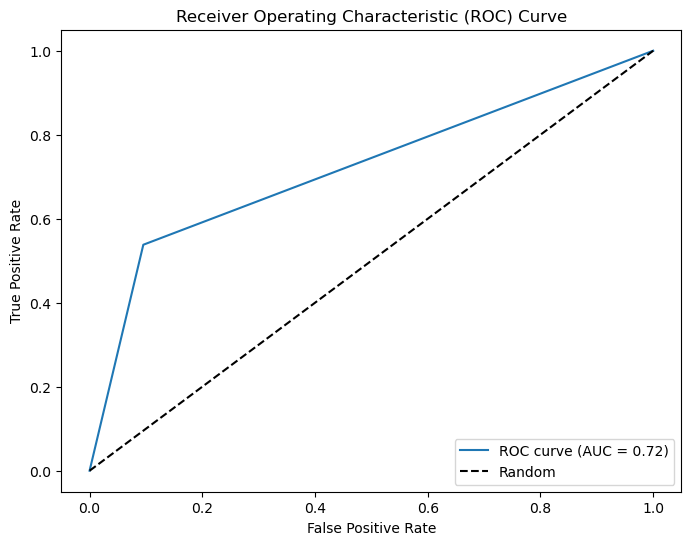

######## roc_auc_score : 
TRAIN : 0.7210953425765992
TEST : 0.7213635017412706


In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("######## roc_auc_score : ")    
print("TRAIN :",roc_auc_score(y_train, y_pred_train))
print("TEST :",roc_auc_score(y_test, y_pred_test))  

